#**Prodigy Infotech**

**Abdallah Fekry Mohammed**

ML Internship

Task_3: Dogs and Cats Classification

Support Vector Machine SVM

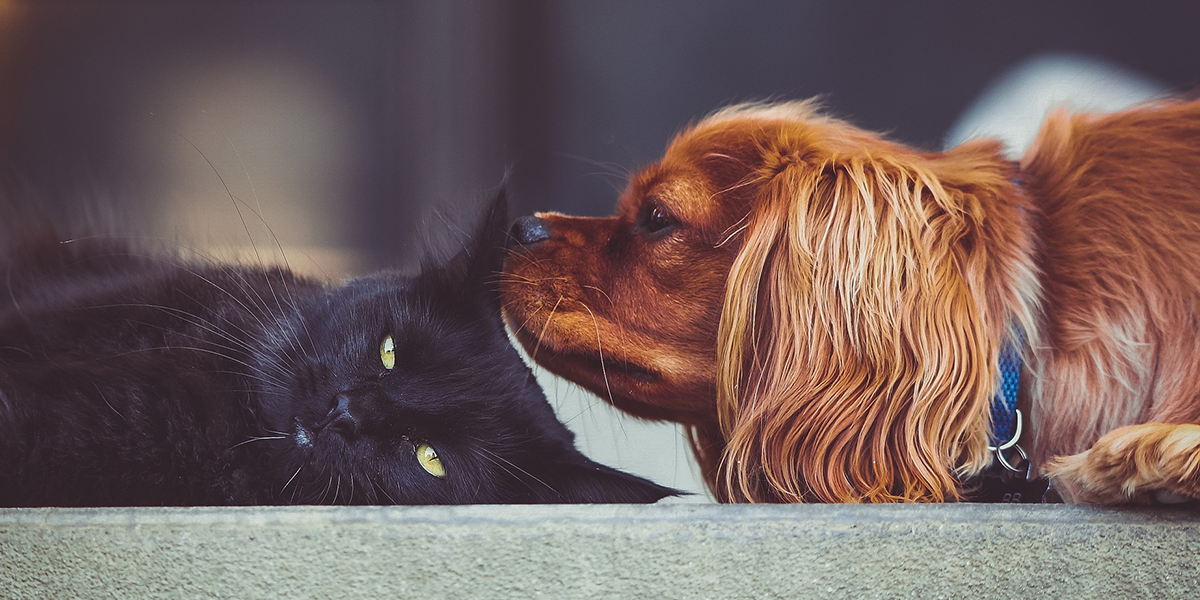

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from keras.utils import load_img,img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs/train',
                                               target_size=(224,224),
                                               batch_size=1,
                                               class_mode='binary',
                                               shuffle=False)
test_data = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs/val',
                                               target_size=(224,224),
                                               batch_size=1,
                                               class_mode='binary',
                                               shuffle=False)
train_data.labels


Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
train_data[0][0]

array([[[[0.8196079 , 0.7960785 , 0.8117648 ],
         [0.882353  , 0.8588236 , 0.8745099 ],
         [0.8980393 , 0.8745099 , 0.89019614],
         ...,
         [0.8470589 , 0.8078432 , 0.8117648 ],
         [0.8352942 , 0.7960785 , 0.8000001 ],
         [0.8352942 , 0.7960785 , 0.8000001 ]],

        [[0.8235295 , 0.8000001 , 0.81568635],
         [0.8862746 , 0.86274517, 0.87843144],
         [0.90196085, 0.87843144, 0.8941177 ],
         ...,
         [0.85098046, 0.8117648 , 0.81568635],
         [0.83921576, 0.8000001 , 0.80392164],
         [0.83921576, 0.8000001 , 0.80392164]],

        [[0.8313726 , 0.8078432 , 0.8235295 ],
         [0.8941177 , 0.8705883 , 0.8862746 ],
         [0.9058824 , 0.882353  , 0.8980393 ],
         ...,
         [0.8588236 , 0.8196079 , 0.8235295 ],
         [0.85098046, 0.8117648 , 0.81568635],
         [0.85098046, 0.8117648 , 0.81568635]],

        ...,

        [[0.8235295 , 0.8117648 , 0.79215693],
         [0.8470589 , 0.8352942 , 0.8078432 ]

In [8]:
train_data[0][1]

array([0.], dtype=float32)

In [11]:
def splitXY(data):
    x = []
    y = []
    for i in range(1,len(data)):
      x.append(data[i][0])
      y.append(data[i][1])
    return x,y

In [12]:
x_train, y_train = splitXY(train_data)
x_test, y_test = splitXY(test_data)

In [15]:
for i in range(len(x_train)):
    x_train[i] = x_train[i].reshape(-1,)

In [16]:
model = SVC()
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [20]:
for i in range(len(x_test)):
    x_test[i] = x_test[i].reshape(-1,)

In [36]:
yp = model.predict(x_test)
yp_train = model.predict(x_train)
yp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)

In [37]:
score = f1_score(y_test,yp)
score_train = f1_score(y_train,yp_train)
print("F1 Score train:",score_train.round(4)*100,'%')
print("F1 Score test:",score.round(4)*100,'%')

F1 Score train: 86.33 %
F1 Score test: 78.95 %


In [41]:
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.98      0.66      0.79        68

    accuracy                           0.65        69
   macro avg       0.49      0.33      0.39        69
weighted avg       0.96      0.65      0.78        69



In [45]:
len(yp)

69

In [46]:
len(y_test)

69

In [60]:
y_test = np.array(y_test).reshape(-1,)

Support Vector Machine SVM Heatmap



<Axes: xlabel='predicted', ylabel='Actual'>

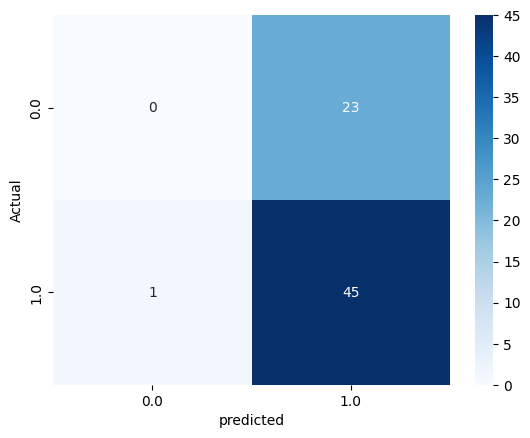

In [63]:
print("Support Vector Machine SVM Heatmap\n")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['predicted'])
sns.heatmap(m,annot=True, cmap='Blues')